# Placing roles with State of the Art Models

Following preliminary experimentation with ChatGPT, it was observed that ChatGPT performs effectively when prompted to assume specific roles. Consequently, both ChatGPT and Gemma were prompted to adopt the role of the stand-up comedian corresponding to the transcript from which they were extracting quotes. As expected, ChatGPT outperformed Gemma in this task. Moreover, assuming the role of the comedian did not enhance ChatGPT's performance. However, the standard version of ChatGPT achieved the highest frequency of scores exceeding 60%, as depicted in the graph.

### Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [2]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
pretend_gemma = pd.read_csv("/home/ada/humor/data/stand_up_dataset/play pretend - Sheet1.csv")
pretend_gpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/play pretend chatgpt - Sheet1.csv")
normal_gpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")

In [3]:
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj", "Sam_Morril_2", "Trevor_Noah_2", "Chelsea_Peretti", "Russell_Peters"])]
llm_gemma = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj", "Sam_Morril_2", "Trevor_Noah_2", "Chelsea_Peretti", "Russell_Peters"])]
llm_pretend_gemma = pretend_gemma.loc[pretend_gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Joe_List","Anthony_Jeselnik", "Ali_Wong", "Hasan_Minhaj", "Sam_Morril_2", "Trevor_Noah_2", "Chelsea_Peretti", "Russell_Peters"])]

### Experiment

In [4]:
normal_gpt_metric = bipartite_metric(normal_gpt, llm_gt)
print("Normal GPT:", normal_gpt_metric.select_dtypes(include='number').mean())

pretend_gpt_metric = bipartite_metric(pretend_gpt, llm_gt)
print("Pretend GPT:", pretend_gpt_metric.select_dtypes(include='number').mean())

llm_gemma_metric = bipartite_metric(llm_gemma, llm_gt)
print("Gemma:", llm_gemma_metric.select_dtypes(include='number').mean())

llm_pretend_gemma_metric = bipartite_metric(llm_pretend_gemma, llm_gt)
print("Pretend Gemma:", llm_pretend_gemma_metric.select_dtypes(include='number').mean())

Normal GPT: score    50.261667
dtype: float64
Pretend GPT: score    45.172024
dtype: float64
Gemma: score    27.079583
dtype: float64
Pretend Gemma: score    26.013095
dtype: float64


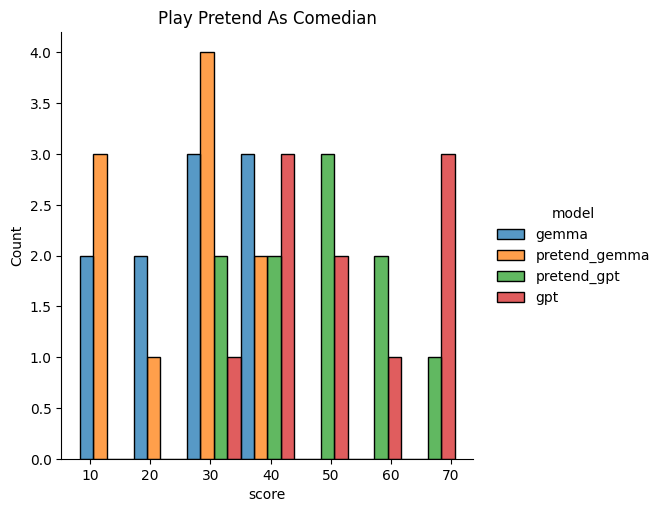

In [5]:
pretend_gemma = llm_pretend_gemma_metric.assign(model="pretend_gemma")
gemma = llm_gemma_metric.assign(model="gemma")
pretend_gpt = pretend_gpt_metric.assign(model="pretend_gpt")
normal_gpt = normal_gpt_metric.assign(model="gpt")
df = pd.concat([gemma, pretend_gemma, pretend_gpt, normal_gpt]).reset_index(drop=True)

sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge")
plt.title("Play Pretend As Comedian")
plt.show()